<a href="https://colab.research.google.com/github/eangelb29/NGG6050_Assignments/blob/main/Probability_Distributions_1_AB090325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:207: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


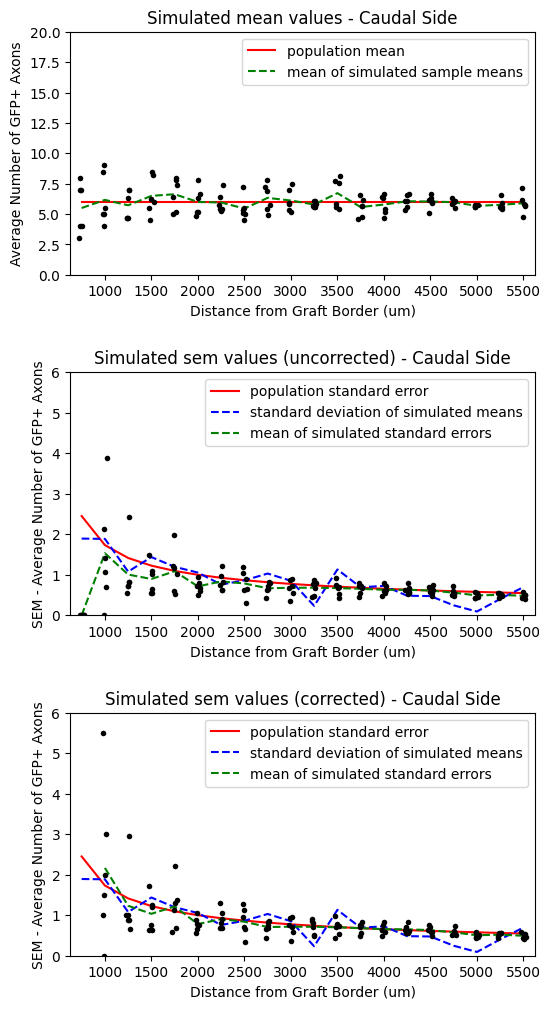

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display, clear_output
import seaborn as sns

#Based on paper showing a T Distribution (Figure 2F): https://www.nature.com/articles/s41467-022-33134-x#Sec2
# I will just do the caudal side

# Use Poisson distribution to simulate measurements of spike rates
poisson_rate = 6

# Simulate num experiments, using sample sizes n=1:num
num_experiments_per_n = 6
max_n_per_experiment = 20
means = np.zeros((max_n_per_experiment, num_experiments_per_n))
stds = np.zeros((max_n_per_experiment, num_experiments_per_n, 2))
# bessel_corrected_stds = np.zeros((max_n_per_experiment, num_experiments_per_n, 2))
ns = np.arange(1,max_n_per_experiment+1)

# Simulate different sample sizes
for n in ns:

    # Simulate multiple experiments
    samples = np.random.poisson(poisson_rate, (num_experiments_per_n, n))

    # Compute the sample mean and std from each experiment
    means[n-1,:] = samples.mean(axis=1)
    stds[n-1,:,0] = samples.std(axis=1,ddof=0)
    stds[n-1,:,1] = samples.std(axis=1,ddof=1)

# Set up figure
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
fig.subplots_adjust(hspace=0.4)

# Top plot is means. Note that the simulated sample means (black dots) provide, on average,
# an unbiased estimate (the mean of the simulated sample means, plotted as a dashed green line)
# of the population mean (red line)
plt.axes(axs[0]).axis([0, max_n_per_experiment, 0, 20])
plt.xlabel('Distance from Graft Border (um)')
plt.ylabel('Average Number of GFP+ Axons')
sns.stripplot(data=means.transpose(),jitter=True,size=4,color='black')
plt.plot([ns[0]-1, ns[-1]-1], [poisson_rate, poisson_rate], 'r-', label="population mean")
plt.plot(ns-1, means.mean(axis=1), 'g--', label="mean of simulated sample means")
plt.title('Simulated mean values - Caudal Side')
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], ['1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500'])
plt.legend(loc='upper right')

# Next plots are sems computed without/with Bessel correction.
# Note that the simulated sample sems (black dots) provide, on average,
# a biased estimate (the mean of the simulated sample standard errors,
# plotted as a dashed green line) of the population standard error (red line),
# which is matched by the standard deviation of the simulated means (blue line).
# This bias is highest for small n and is substantially reduced using
# Bessel's correction
#
# Note that computing the corrected sem returns an error for n=1, for which
# the corrected sample sem is not defined (because (n-1) is in the denominator)
title_string = ['uncorrected', 'corrected']
for i in np.arange(2):
    plt.axes(axs[i+1]).axis([0, max_n_per_experiment, 0, 6])
    plt.xlabel('Distance from Graft Border (um)')
    plt.ylabel('SEM - Average Number of GFP+ Axons')
    sqrt_ns = np.sqrt(ns)
    sems = stds[:,:,i].transpose()/sqrt_ns[None,:]
    sns.stripplot(data=sems,jitter=True,size=4,color='black')
    plt.plot(ns-1, np.sqrt(poisson_rate/ns), 'r-', label="population standard error")
    plt.plot(ns-1, means.std(axis=1), 'b--', label="standard deviation of simulated means")
    plt.plot(ns-1,sems.mean(axis=0),'g--', label="mean of simulated standard errors")
    plt.title(f'Simulated sem values ({title_string[i]}) - Caudal Side')
    plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], ['1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500'])
    plt.legend(loc='upper right')